In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Data
data = pd.read_csv(r'C:\Local MOAI PROJECT\merged_data.csv')

# Initial Data Exploration
print(data.head())
print(data.isnull().sum())
print(data.describe())
print(data.info())

         date        road_name                    location      suburb  \
0  2014-10-11  Wolseley Parade  North East of Derby Street  Kensington   
1  2014-10-11  Wolseley Parade  North East of Derby Street  Kensington   
2  2014-10-11  Wolseley Parade  North East of Derby Street  Kensington   
3  2014-11-11  Wolseley Parade  North East of Derby Street  Kensington   
4  2014-11-11  Wolseley Parade  North East of Derby Street  Kensington   

   speed_limit direction   time  vehicle_class_1  vehicle_class_2  \
0           50         W  16:00        24.000000         0.386506   
1           50         W  17:00        42.000000         0.386506   
2           50         W  18:00        33.000000         0.386506   
3           50         W   2:00         3.000000         0.386506   
4           50         W   4:00        86.177384         0.386506   

   vehicle_class_3  ...  status_id  \
0         4.093996  ...          2   
1         4.093996  ...          2   
2         1.000000  ...   

In [3]:
data.head()

,date,road_name,location,suburb,speed_limit,direction,time,vehicle_class_1,vehicle_class_2,vehicle_class_3,...,status_id,seg_descr,poly_area,gisid,street_id,seg_part,Geo Shape x,Geo Shape y,Latitude,Longitude
0,2014-10-11,Wolseley Parade,North East of Derby Street,Kensington,50,W,16:00,24.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
1,2014-10-11,Wolseley Parade,North East of Derby Street,Kensington,50,W,17:00,42.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
2,2014-10-11,Wolseley Parade,North East of Derby Street,Kensington,50,W,18:00,33.000000,0.386506,1.000000,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
3,2014-11-11,Wolseley Parade,North East of Derby Street,Kensington,50,W,2:00,3.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
4,2014-11-11,Wolseley Parade,North East of Derby Street,Kensington,50,W,4:00,86.177384,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383


In [4]:
# Data Cleaning and Preparation
# Rename columns with descriptive names
column_mapping = {
    'vehicle_class_1': 'Light_Vehicles',
    'vehicle_class_2': 'Light_Vehicles_with_Trailer',
    'vehicle_class_3': 'Two_Axle_Trucks_Buses',
    'vehicle_class_4': 'Three_Axle_Trucks_Buses',
    'vehicle_class_5': 'Four_Axle_Trucks',
    'vehicle_class_6': 'Three_Axle_Articulated_Vehicles',
    'vehicle_class_7': 'Four_Axle_Articulated_Vehicles',
    'vehicle_class_8': 'Five_Axle_Articulated_Vehicles',
    'vehicle_class_9': 'Six_Axle_Articulated_Vehicles',
    'vehicle_class_10': 'B_Double_Trucks',
    'vehicle_class_11': 'Double_Road_Trains',
    'vehicle_class_12': 'Triple_Road_Trains',
    'vehicle_class_13': 'Unknown_Vehicles',
    'motorcycle': 'Motorcycles',
    'bike': 'Bicycles'
}
data.rename(columns=column_mapping, inplace=True)

In [5]:
# Step 1: Aggregate the traffic volume by location

# Summing vehicle counts across all vehicle classes to get the total traffic volume for each record
data['total_traffic_volume'] = (
    data['Light_Vehicles'] +
    data['Light_Vehicles_with_Trailer'] +
    data['Two_Axle_Trucks_Buses'] +
    data['Three_Axle_Trucks_Buses'] +
    data['Four_Axle_Trucks'] +
    data['Three_Axle_Articulated_Vehicles'] +
    data['Four_Axle_Articulated_Vehicles'] +
    data['Five_Axle_Articulated_Vehicles'] +
    data['Six_Axle_Articulated_Vehicles'] +
    data['B_Double_Trucks'] +
    data['Double_Road_Trains'] +
    data['Triple_Road_Trains'] +
    data['Unknown_Vehicles'] +
    data['Motorcycles'] +
    data['Bicycles']
)

In [6]:
# Convert 'date' and 'time' to datetime and combine them
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data.drop(columns=['date', 'time'], inplace=True)

In [7]:
# Extract additional time-based features
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['week_of_year'] = data['datetime'].dt.isocalendar().week

In [8]:
# Encoding categorical variables
data['road_name_encoded'] = data['road_name'].astype('category').cat.codes
data['location_encoded'] = data['location'].astype('category').cat.codes
data['suburb_encoded'] = data['suburb'].astype('category').cat.codes

In [9]:
# Text Standardization
columns_to_standardize = ['road_name', 'location', 'suburb']
for col in columns_to_standardize:
    data[col] = data[col].str.lower().str.strip().str.title()

In [10]:
data.head()

,road_name,location,suburb,speed_limit,direction,Light_Vehicles,Light_Vehicles_with_Trailer,Two_Axle_Trucks_Buses,Three_Axle_Trucks_Buses,Four_Axle_Trucks,...,Latitude,Longitude,total_traffic_volume,datetime,hour,day_of_week,week_of_year,road_name_encoded,location_encoded,suburb_encoded
0,Wolseley Parade,North East Of Derby Street,Kensington,50,W,24.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,34.292179,2014-10-11 16:00:00,16,5,41,110,105,5
1,Wolseley Parade,North East Of Derby Street,Kensington,50,W,42.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,52.292179,2014-10-11 17:00:00,17,5,41,110,105,5
2,Wolseley Parade,North East Of Derby Street,Kensington,50,W,33.000000,0.386506,1.000000,0.608382,0.260623,...,-37.796238,144.929383,40.198183,2014-10-11 18:00:00,18,5,41,110,105,5
3,Wolseley Parade,North East Of Derby Street,Kensington,50,W,3.000000,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,13.292179,2014-11-11 02:00:00,2,1,46,110,105,5
4,Wolseley Parade,North East Of Derby Street,Kensington,50,W,86.177384,0.386506,4.093996,0.608382,0.260623,...,-37.796238,144.929383,96.469563,2014-11-11 04:00:00,4,1,46,110,105,5


In [11]:
# Outlier Removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [12]:
columns_to_clean = ['total_traffic_volume', 'average_speed', '85th_percentile_speed', 'maximum_speed']
for column in columns_to_clean:
    data = remove_outliers(data, column)

C:\Users\Nauman\AppData\Local\Temp\ipykernel_12692\158945315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='road_name', y='total_traffic_volume', data=data, ci=None)


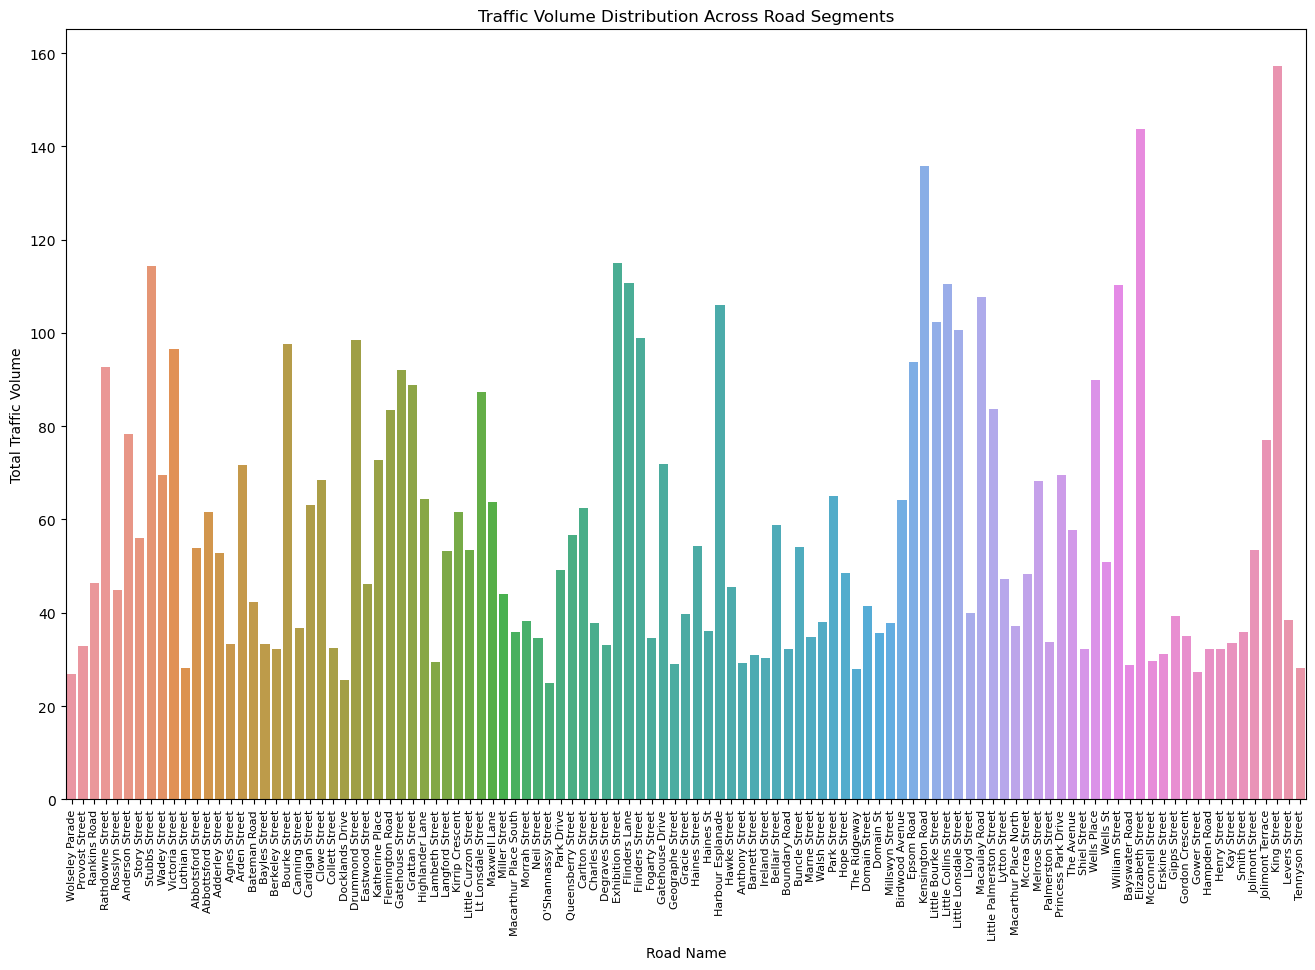

In [13]:
# Visualizations

# 1. Traffic Volume Distribution Across Intersections and Road Segments
plt.figure(figsize=(16, 10))
sns.barplot(x='road_name', y='total_traffic_volume', data=data, ci=None)
plt.title('Traffic Volume Distribution Across Road Segments')
plt.xlabel('Road Name')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=90, fontsize=8)
plt.show()

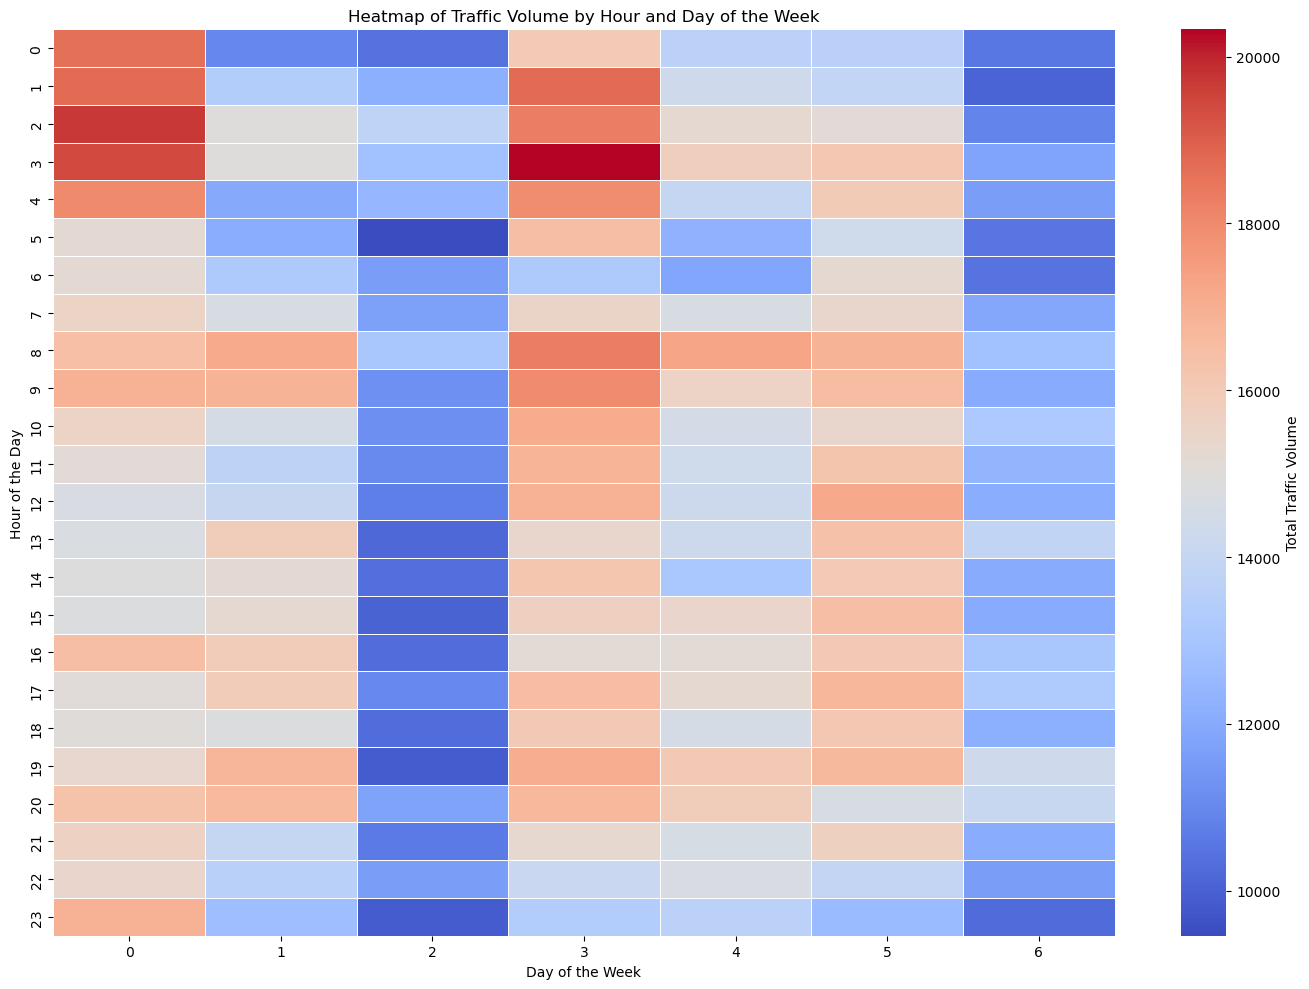

In [14]:
# 2. Heatmap of Traffic Volume by Hour and Day of the Week
traffic_heatmap_data = data.pivot_table(index='hour', columns='day_of_week', values='total_traffic_volume', aggfunc='sum')
plt.figure(figsize=(14, 10))
sns.heatmap(traffic_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Total Traffic Volume'}, linewidths=.5)
plt.title('Heatmap of Traffic Volume by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()

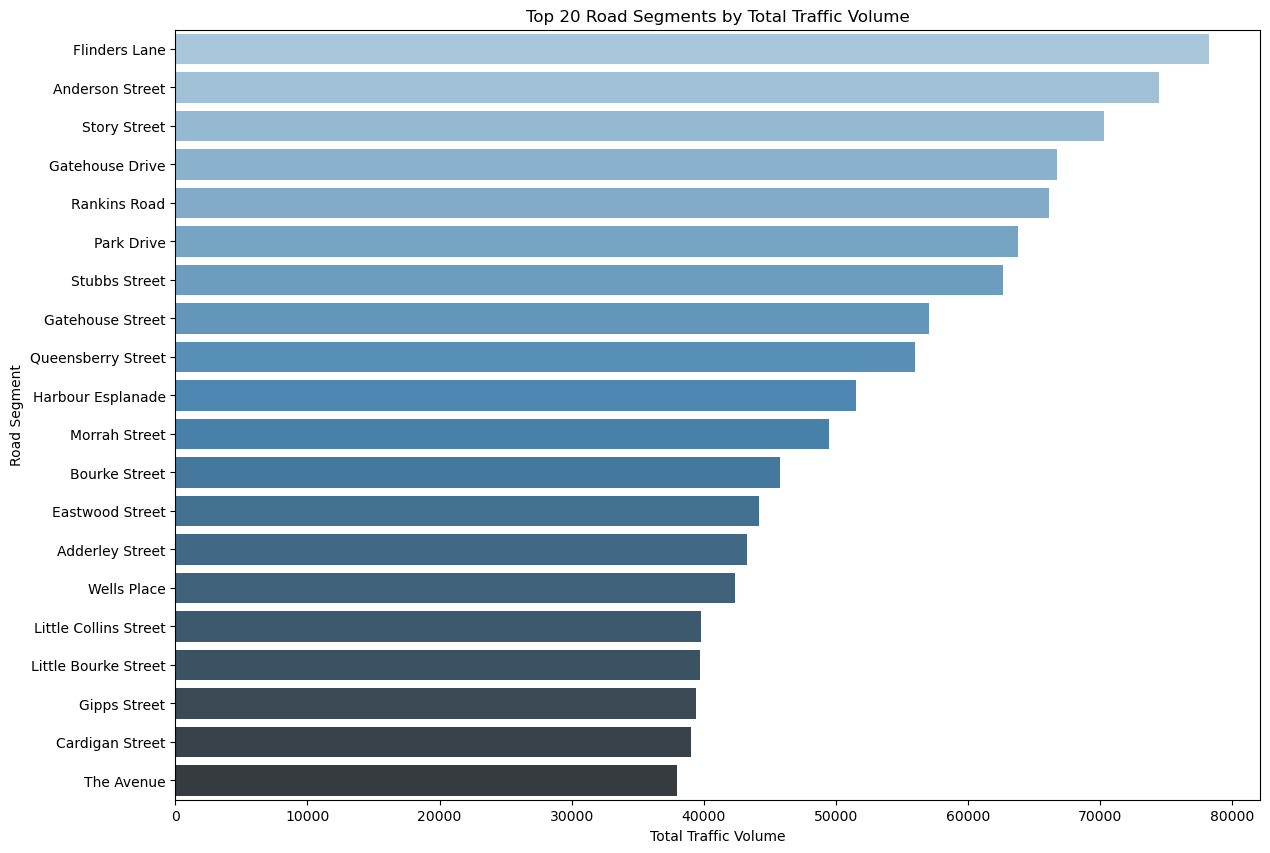

In [15]:
# 3. Bar Plot for Total Traffic Volume by Road Segment
segment_total_volume = data.groupby('road_name').agg(
    total_volume=('total_traffic_volume', 'sum')
).reset_index()
segment_total_volume = segment_total_volume.sort_values(by='total_volume', ascending=False)
top_20_segments = segment_total_volume.head(20)

plt.figure(figsize=(14, 10))
sns.barplot(x='total_volume', y='road_name', data=top_20_segments, palette='Blues_d')
plt.title('Top 20 Road Segments by Total Traffic Volume')
plt.xlabel('Total Traffic Volume')
plt.ylabel('Road Segment')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


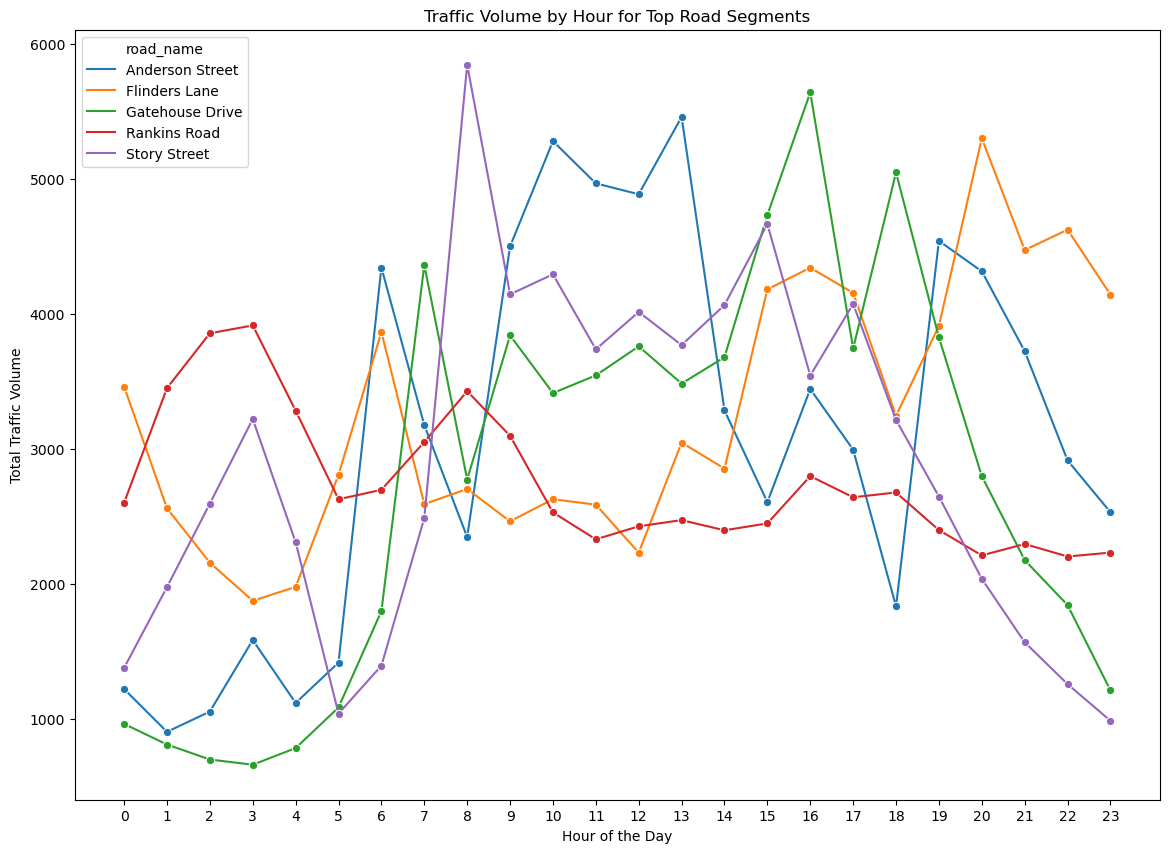

In [16]:
# 4. Line Plot for Traffic Volume by Hour for Top Road Segments
top_segments = segment_total_volume.head(5)['road_name']

hourly_segment_volume = data[data['road_name'].isin(top_segments)].groupby(
    ['road_name', 'hour']
).agg(
    total_volume=('total_traffic_volume', 'sum')
).reset_index()
plt.figure(figsize=(14, 10))
sns.lineplot(x='hour', y='total_volume', hue='road_name', data=hourly_segment_volume, marker="o")
plt.title('Traffic Volume by Hour for Top Road Segments')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic Volume')
plt.xticks(range(0, 24))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


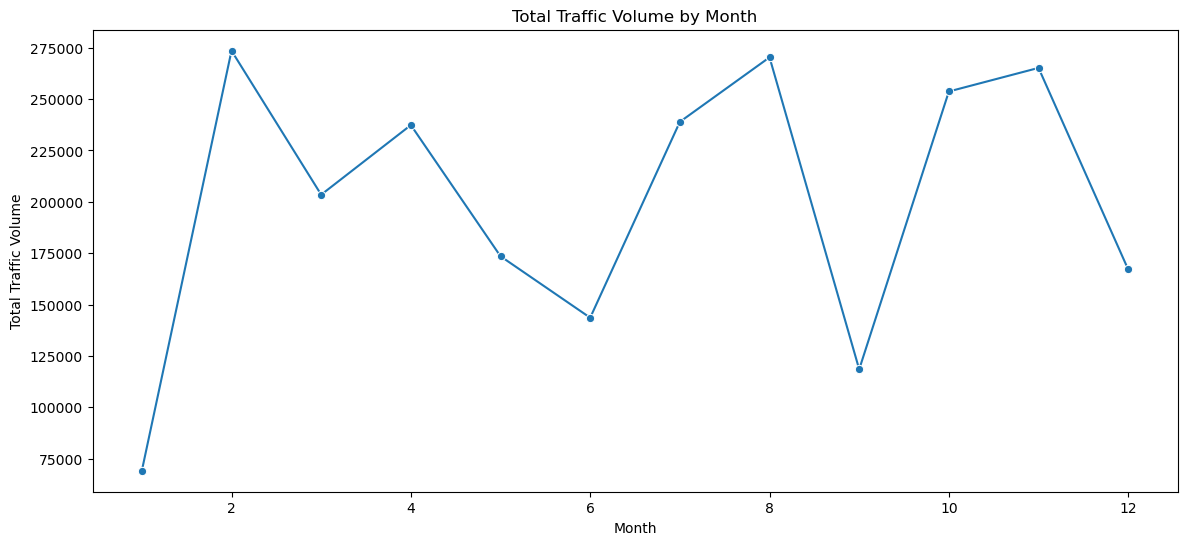

In [17]:
# Example: Traffic volume by month
data['month'] = data['datetime'].dt.month
monthly_volume = data.groupby('month').agg(total_volume=('total_traffic_volume', 'sum')).reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='total_volume', data=monthly_volume, marker="o")
plt.title('Total Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Traffic Volume')
plt.show()

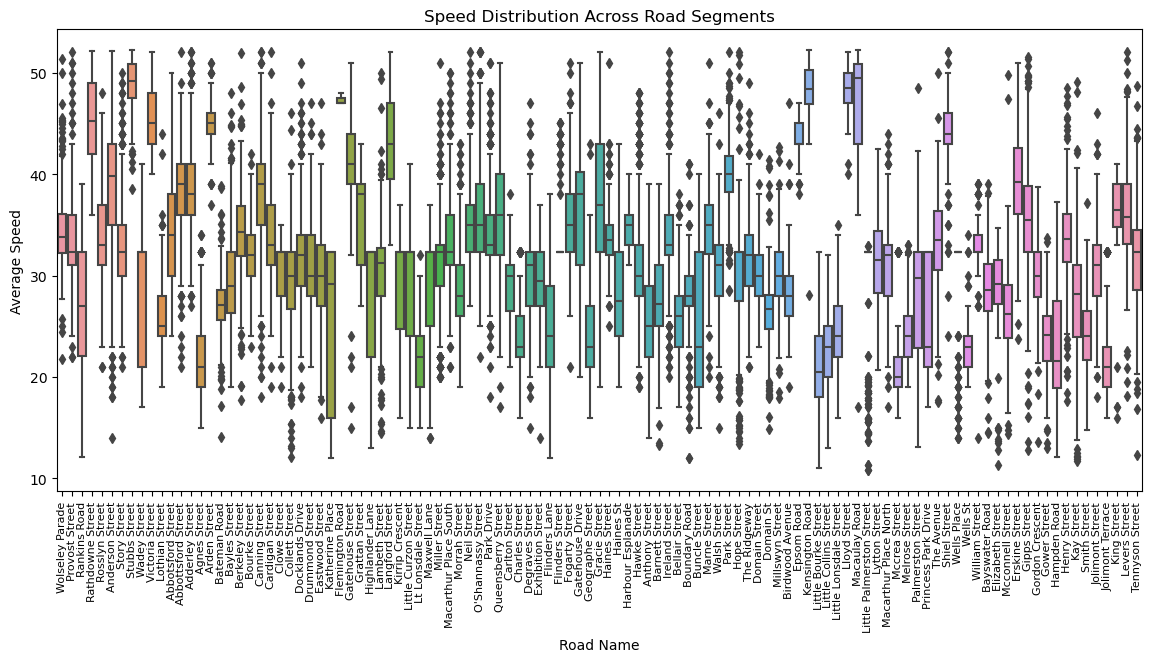

In [18]:
# Example: Speed distribution across different segments
plt.figure(figsize=(14, 6))
sns.boxplot(x='road_name', y='average_speed', data=data)
plt.title('Speed Distribution Across Road Segments')
plt.xlabel('Road Name')
plt.ylabel('Average Speed')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [19]:
import pandas as pd

# Aggregate traffic data by hour, day of the week, and road segment
hourly_day_segment_volume = data.groupby(['road_name', 'hour', 'day_of_week'])['total_traffic_volume'].sum().reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


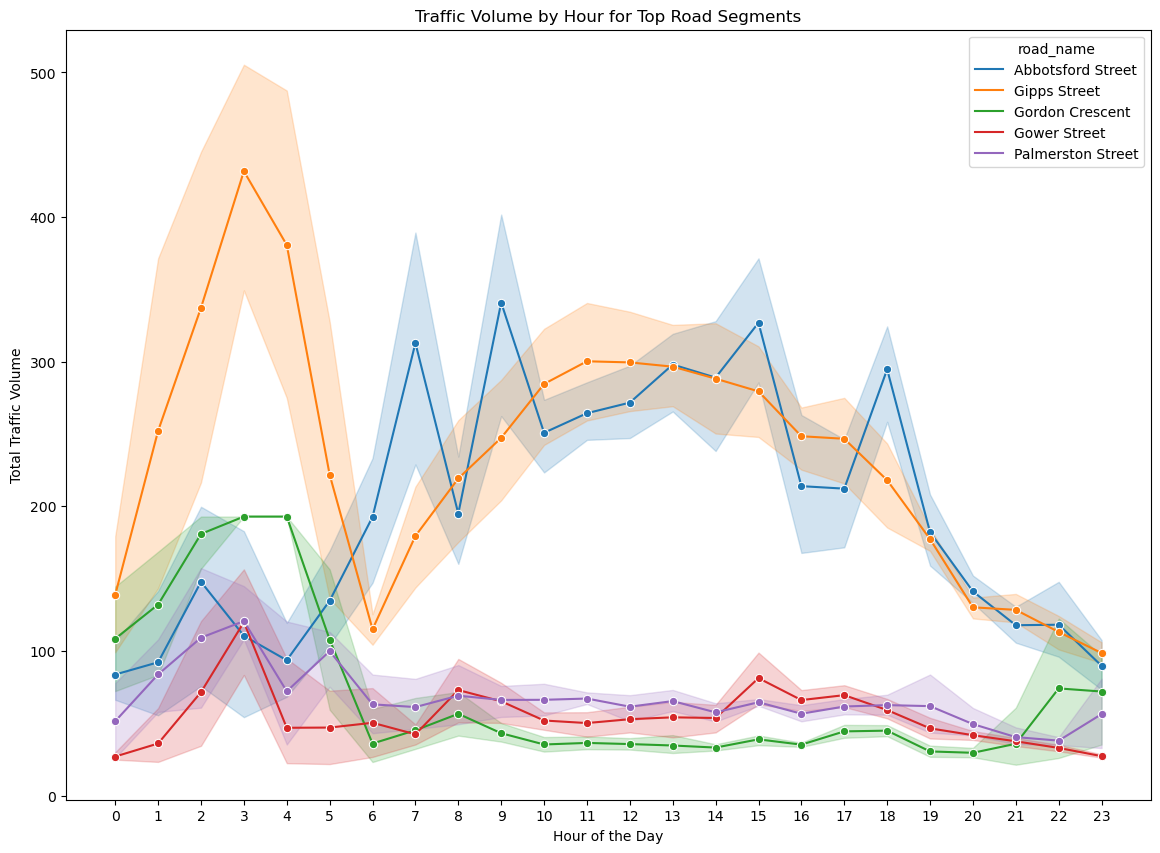

In [20]:
# Plotting the line plot for traffic volume by hour for top road segments
top_segments = hourly_day_segment_volume['road_name'].value_counts().head(5).index
filtered_hourly_data = hourly_day_segment_volume[hourly_day_segment_volume['road_name'].isin(top_segments)]

plt.figure(figsize=(14, 10))
sns.lineplot(x='hour', y='total_traffic_volume', hue='road_name', data=filtered_hourly_data, marker="o")
plt.title('Traffic Volume by Hour for Top Road Segments')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Traffic Volume')
plt.xticks(range(0, 24))
plt.show()

In [21]:
# Finding peak traffic times (e.g., highest traffic volume by hour)
peak_times = hourly_day_segment_volume.groupby('hour')['total_traffic_volume'].sum().nlargest(5)
print("Peak Traffic Hours:", peak_times)

Peak Traffic Hours: hour
8     111977.992627
3     111266.591254
2     107962.647168
9     107106.563919
19    106062.358358
Name: total_traffic_volume, dtype: float64


In [22]:
# Finding most congested road segments (e.g., highest traffic volume)
congested_segments = hourly_day_segment_volume.groupby('road_name')['total_traffic_volume'].sum().nlargest(5)
print("Most Congested Road Segments:", congested_segments)

Most Congested Road Segments: road_name
Flinders Lane      78199.172213
Anderson Street    74458.500742
Story Street       70279.642232
Gatehouse Drive    66690.828304
Rankins Road       66083.332029
Name: total_traffic_volume, dtype: float64


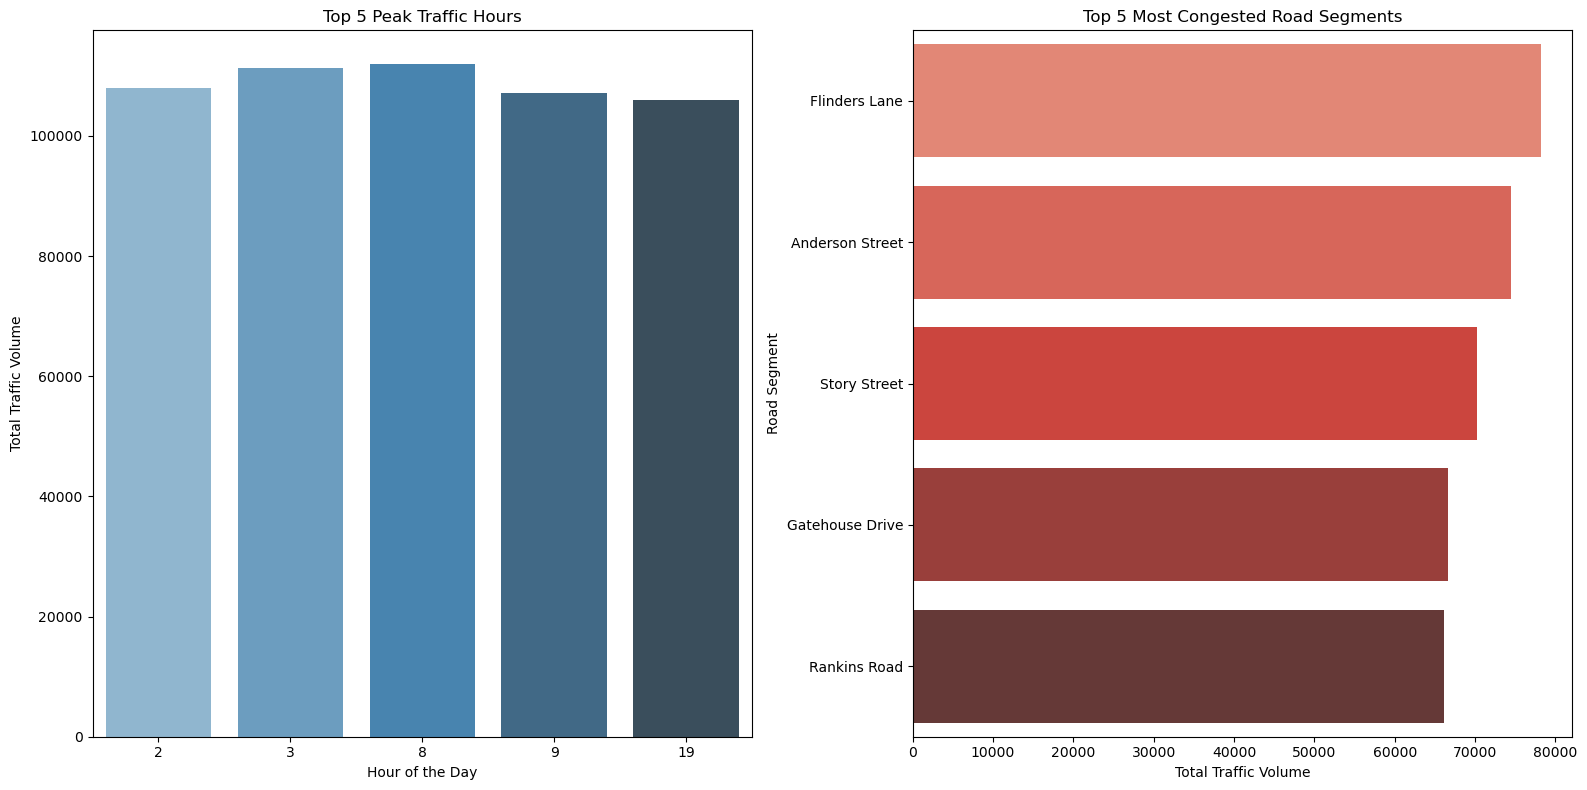

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finding peak traffic times
peak_times = hourly_day_segment_volume.groupby('hour')['total_traffic_volume'].sum().nlargest(5)
peak_times = peak_times.reset_index()

# Finding most congested road segments
congested_segments = hourly_day_segment_volume.groupby('road_name')['total_traffic_volume'].sum().nlargest(5)
congested_segments = congested_segments.reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plotting Peak Traffic Hours
sns.barplot(x='hour', y='total_traffic_volume', data=peak_times, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 Peak Traffic Hours')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Traffic Volume')

# Plotting Most Congested Road Segments
sns.barplot(x='total_traffic_volume', y='road_name', data=congested_segments, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 5 Most Congested Road Segments')
axes[1].set_xlabel('Total Traffic Volume')
axes[1].set_ylabel('Road Segment')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Nauman\AppData\Local\Temp\ipykernel_12692\2916692408.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='road_name', y='total_volume', hue='direction', data=filtered_direction_segment_volume, ci=None, palette='viridis')


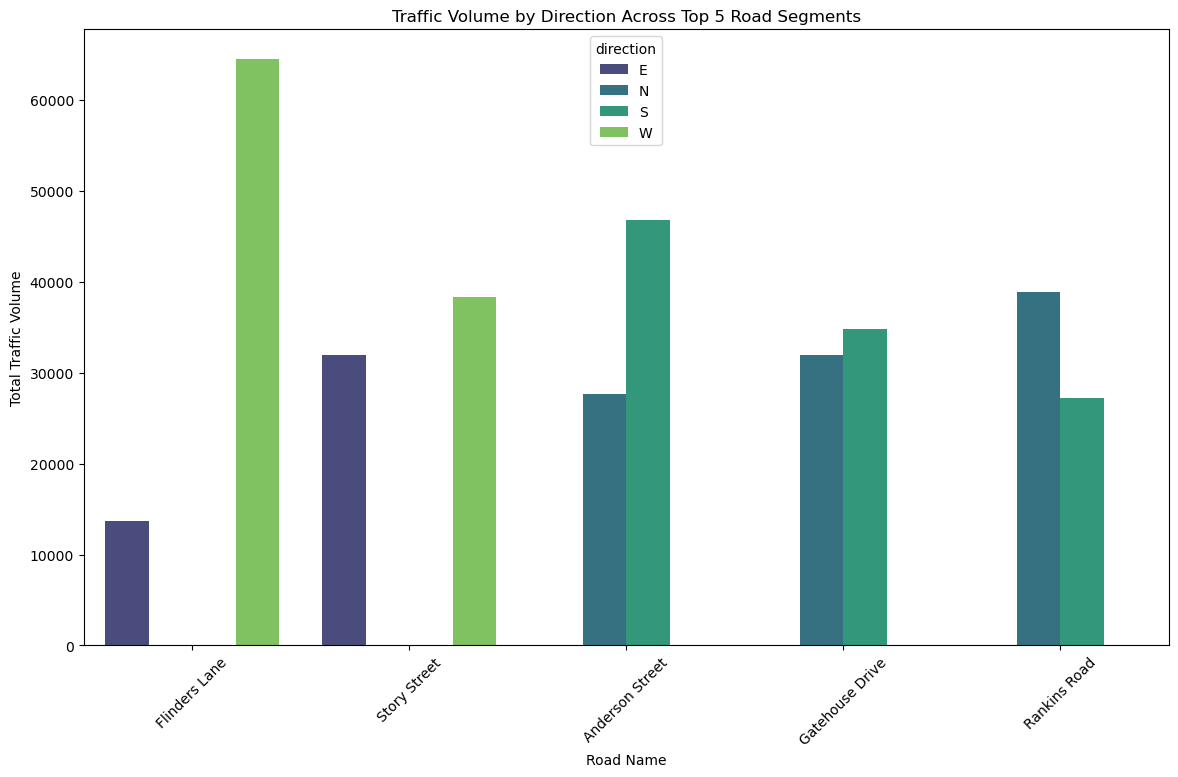

In [24]:
# Recreate the direction_segment_volume DataFrame
direction_segment_volume = data.groupby(['direction', 'road_name']).agg(
    total_volume=('total_traffic_volume', 'sum')
).reset_index()

# Filtering to show only the top 5 road segments based on total traffic volume across all directions
top_5_road_segments = direction_segment_volume.groupby('road_name').agg(
    total_volume=('total_volume', 'sum')
).reset_index().sort_values(by='total_volume', ascending=False).head(5)['road_name']

# Filter the data to include only these top 5 road segments
filtered_direction_segment_volume = direction_segment_volume[direction_segment_volume['road_name'].isin(top_5_road_segments)]

# Visualization: Traffic Volume by Direction Across Top 5 Road Segments
plt.figure(figsize=(14, 8))
sns.barplot(x='road_name', y='total_volume', hue='direction', data=filtered_direction_segment_volume, ci=None, palette='viridis')
plt.title('Traffic Volume by Direction Across Top 5 Road Segments')
plt.xlabel('Road Name')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.show()